Columns in the DataFrame: Index(['bus_stop_id', 'bus_id', 'enter_sum', 'exit_sum',
       'bus_board_computer_sent_time', 'created_time', 'route_number',
       'tickets_count', 'id'],
      dtype='object')
Column 'bus_board_computer_sent_time' not found!


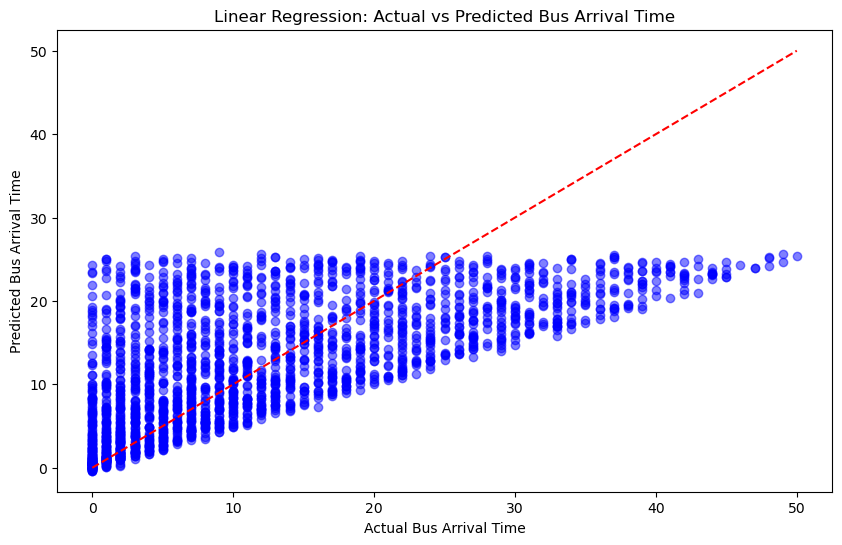

Linear Regression Mean Squared Error: 72.58798991559402


In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

file1 = 'modified.csv'
file2 = 'modified_1.csv'

df1 = pd.read_csv(file1)
df2 = pd.read_csv(file2)

df = pd.concat([df1, df2], ignore_index=True)

df.dropna(inplace=True)

print("Columns in the DataFrame:", df.columns)

df['bus_board_computer_sent_time'] = pd.to_datetime(df['bus_board_computer_sent_time'], errors='coerce', format='ISO8601')

if df['bus_board_computer_sent_time'].isna().sum() > 0:
    print(f"Warning: {df['bus_board_computer_sent_time'].isna().sum()} invalid datetime entries were found and coerced.")
    
df['hour'] = df['bus_board_computer_sent_time'].dt.hour
df['minute'] = df['bus_board_computer_sent_time'].dt.minute
df['day'] = df['bus_board_computer_sent_time'].dt.day
df['month'] = df['bus_board_computer_sent_time'].dt.month
df['year'] = df['bus_board_computer_sent_time'].dt.year

df.drop(columns=['bus_board_computer_sent_time'], inplace=True)

df['bus_stop_id'] = df['bus_stop_id'].astype('category').cat.codes
df['route_number'] = df['route_number'].astype('category').cat.codes

features = ['bus_stop_id', 'route_number', 'enter_sum', 'exit_sum', 'hour', 'minute', 'day', 'month', 'year']
X = df[features]

# Check if the 'bus_board_computer_sent_time' column exists before proceeding
if 'bus_board_computer_sent_time' in df.columns:
    y = df['bus_board_computer_sent_time'].astype(int)  # Convert datetime to integer representation (timestamp)
else:
    print("Column 'bus_board_computer_sent_time' not found!")
    # You can handle this error appropriately, depending on your use case

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

linear_reg_model = LinearRegression()
linear_reg_model.fit(X_train_scaled, y_train)

y_pred_linear = linear_reg_model.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred_linear)

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_linear, color='blue', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.title('Linear Regression: Actual vs Predicted Bus Arrival Time')
plt.xlabel('Actual Bus Arrival Time')
plt.ylabel('Predicted Bus Arrival Time')
plt.show()

print(f"Linear Regression Mean Squared Error: {mse}")
